In [60]:
import os
import sys 
import random
import warnings


import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
import statistics
import pandas as pd

%matplotlib inline

In [51]:
img_width = 128
img_height = 128
img_channels = 3

train_path = 'C:/Users/harshig/Desktop/Day and Night Classification/'
#train_ids = next(os.walk(train_path))[2]
random.seed = 42

In [58]:
#import glob
#images = [cv2.imread(file) for file in glob.glob(train_path+"*.jpg")]

classes=os.listdir(train_path)
x1 = []
x2 = []
x3 = []
y = []

for fol in classes:
    images = os.listdir(train_path+fol)
    for img in images:
        image = cv2.imread(train_path+fol+'/'+img)
        image = cv2.resize(image, (img_width,img_height))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        hue_img, sat_img, val_img = image[:,:,0], image[:,:,1], image[:,:,2]
        hue_img_array = np.ndarray.flatten(hue_img)
        sat_img_array = np.ndarray.flatten(sat_img)
        val_img_array = np.ndarray.flatten(val_img)
        hue_img_mean = statistics.mean(hue_img_array)
        sat_img_mean = statistics.mean(sat_img_array)
        val_img_mean = statistics.mean(val_img_array)
        x1.append(hue_img_mean)
        x2.append(sat_img_mean)
        x3.append(val_img_mean)
        y.append(fol)                              

In [64]:
train_data = pd.DataFrame(
    {'class': y,
     'hue_img_mean': x1,
     'sat_img_mean': x2,
     'val_img_mean': x3
    })

In [70]:
x_new = train_data.drop('class', axis=1)  
y_new = train_data['class']  

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.20)

In [71]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(x_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
y_pred = svclassifier.predict(x_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[3 0]
 [0 1]]
             precision    recall  f1-score   support

        day       1.00      1.00      1.00         3
      night       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         4



In [74]:
y_pred = svclassifier.predict(x_test)
print('accuracy: %f' % (np.mean(y_pred == y_test)))

accuracy: 1.000000


In [ ]:
# Test cells below for difference in histograms

In [2]:
day_image = cv2.imread('C:/Users/harshig/Desktop/Day and Night Classification/Day/Day1.jpg')
night_image = cv2.imread('C:/Users/harshig/Desktop/Day and Night Classification/Night/night1.jpg')

#Resizing Images

day_image = cv2.resize(day_image, (128,128))
night_image = cv2.resize(night_image, (128,128))

In [3]:
day_image = cv2.cvtColor(day_image, cv2.COLOR_BGR2RGB)
night_image = cv2.cvtColor(night_image, cv2.COLOR_BGR2RGB)

<function matplotlib.pyplot.show>

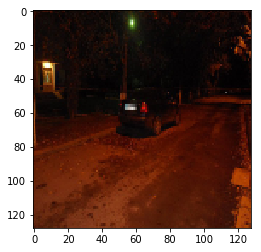

In [4]:
#plt.imshow(day_image)
plt.imshow(night_image)
plt.show

In [5]:
hsv_day_image = cv2.cvtColor(day_image, cv2.COLOR_RGB2HSV)
hsv_night_image = cv2.cvtColor(night_image, cv2.COLOR_RGB2HSV)

In [6]:
hue_day, sat_day, val_day = hsv_day_image[:,:,0], hsv_day_image[:,:,1], hsv_day_image[:,:,2]
hue_night, sat_night, val_night = hsv_night_image[:,:,0], hsv_night_image[:,:,1], hsv_night_image[:,:,2]

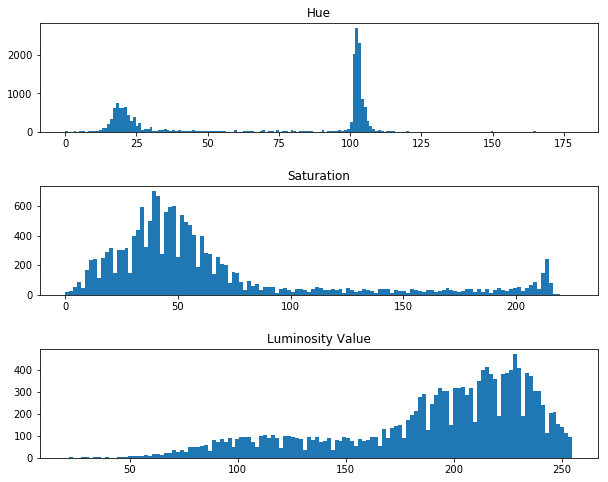

In [7]:
plt.figure(figsize=(10,8))
plt.subplot(311)                             #plot in the first cell
plt.subplots_adjust(hspace=.5)
plt.title("Hue")
plt.hist(np.ndarray.flatten(hue_day), bins=180)
plt.subplot(312)                             #plot in the second cell
plt.title("Saturation")
plt.hist(np.ndarray.flatten(sat_day), bins=128)
plt.subplot(313)                             #plot in the third cell
plt.title("Luminosity Value")
plt.hist(np.ndarray.flatten(val_day), bins=128)
plt.show()

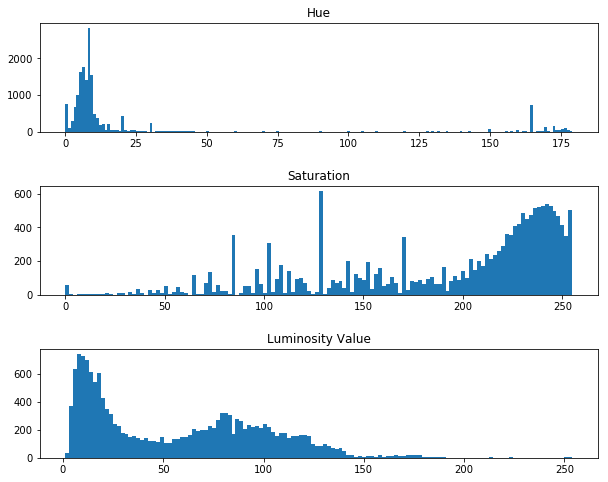

In [8]:
plt.figure(figsize=(10,8))
plt.subplot(311)                             #plot in the first cell
plt.subplots_adjust(hspace=.5)
plt.title("Hue")
plt.hist(np.ndarray.flatten(hue_night), bins=180)
plt.subplot(312)                             #plot in the second cell
plt.title("Saturation")
plt.hist(np.ndarray.flatten(sat_night), bins=128)
plt.subplot(313)                             #plot in the third cell
plt.title("Luminosity Value")
plt.hist(np.ndarray.flatten(val_night), bins=128)
plt.show()

In [9]:
hue_day_array = np.ndarray.flatten(hue_day)

In [10]:
hue_day_list = hue_day_array.tolist()

In [25]:
import statistics
statistics.mean(hue_day_array)

70

In [14]:
hue_night_array = np.ndarray.flatten(hue_night)
hue_night_list = hue_night_array.tolist()

In [26]:
statistics.mean(hue_night_array)

24

In [28]:
# Defining functions for extracting features

def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [29]:
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image],[0,1,2],None,[256,256,256],[0,256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    hist.flatten()

In [30]:
def fd_haralick(image):    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick

In [ ]:
global_feature = np.hstack([fd_histogram(image), fd_haralick(image), fd_hu_moments(image)])
scaler = MinMaxScaler(feature_range=(0, 1))
#Normalize The feature vectors...
rescaled_features = scaler.fit_transform(global_features)

In [ ]:
from sklearn.svm import SVC
clf = models.append(('SVM', SVC(random_state=9)))
prediction= clf.fit(global_feature.reshape(1,-1))[0]